# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the neut cells

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2e_neut_dr_20200615.h5ad")

In [5]:
adata.shape

(16370, 33712)

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC               92
MPP myeloid       92
CMP              425
GMP             1285
neut myeloid    4184
promyelocyte    1922
myelocyte       3854
neutrophil      4516
dtype: int64

# Get monocle3 metadata and save into DC cell obj

In [7]:
metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/neut_monocle3_pst_metadata_20200615.csv")
metadata.index=metadata["Unnamed: 0"]
metadata[:5]

,Unnamed: 0,cell_color
Unnamed: 0,,
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AACTGGTGTAAGTGTA,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAC...,67129.028135
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGGCCAAGGATTCGG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,18054.367147
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGGCCATCAGTTTGG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,124924.426782
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGTCAAGTTAGGGTG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,128435.353263
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ATGAGGGCAGCTCGAC,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ATG...,125718.527847


In [8]:
metadata.columns

Index(['Unnamed: 0', 'cell_color'], dtype='object')

In [9]:
adata.obs["monocle3_pst_val"] = metadata["cell_color"]
adata.obs["monocle3_pst_val"] = adata.obs["monocle3_pst_val"].replace(np.inf, np.nan)

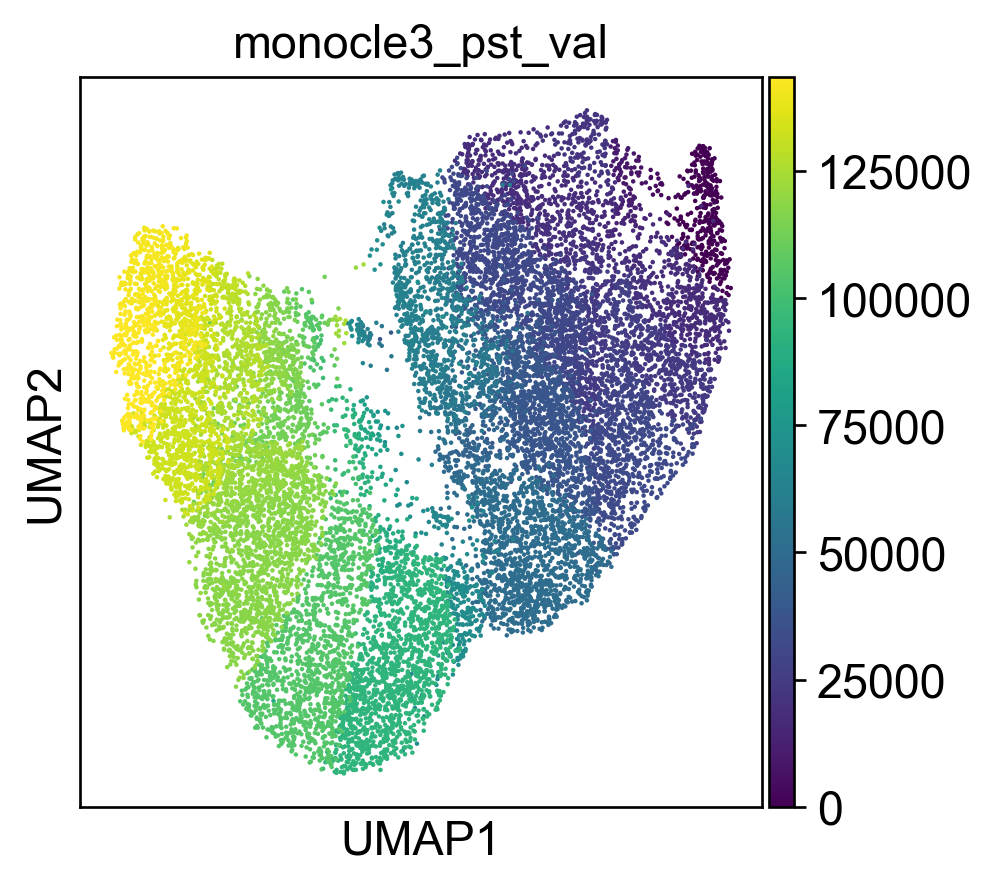

In [10]:
sc.pl.umap(adata, color="monocle3_pst_val")

In [11]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2e_neut_dr_20200615.h5ad")

# Run plots for genes over pseudotime

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2e_neut_dr_20200615.h5ad")

# Plot heatmap

In [5]:
genes = ['HAX1', 'ELANE', 'G6PC3', 'SLC37A4', 'TAZ', 'WAS', 'TCIRG1', 'CXCR4', 'JAGN1', 'VPS13B', 'GFI1',
        'VPS45', 'WDR1', 'AP3B1', 'LAMTOR2', 'KAT6A', 'CHD2', 'HUWE1']

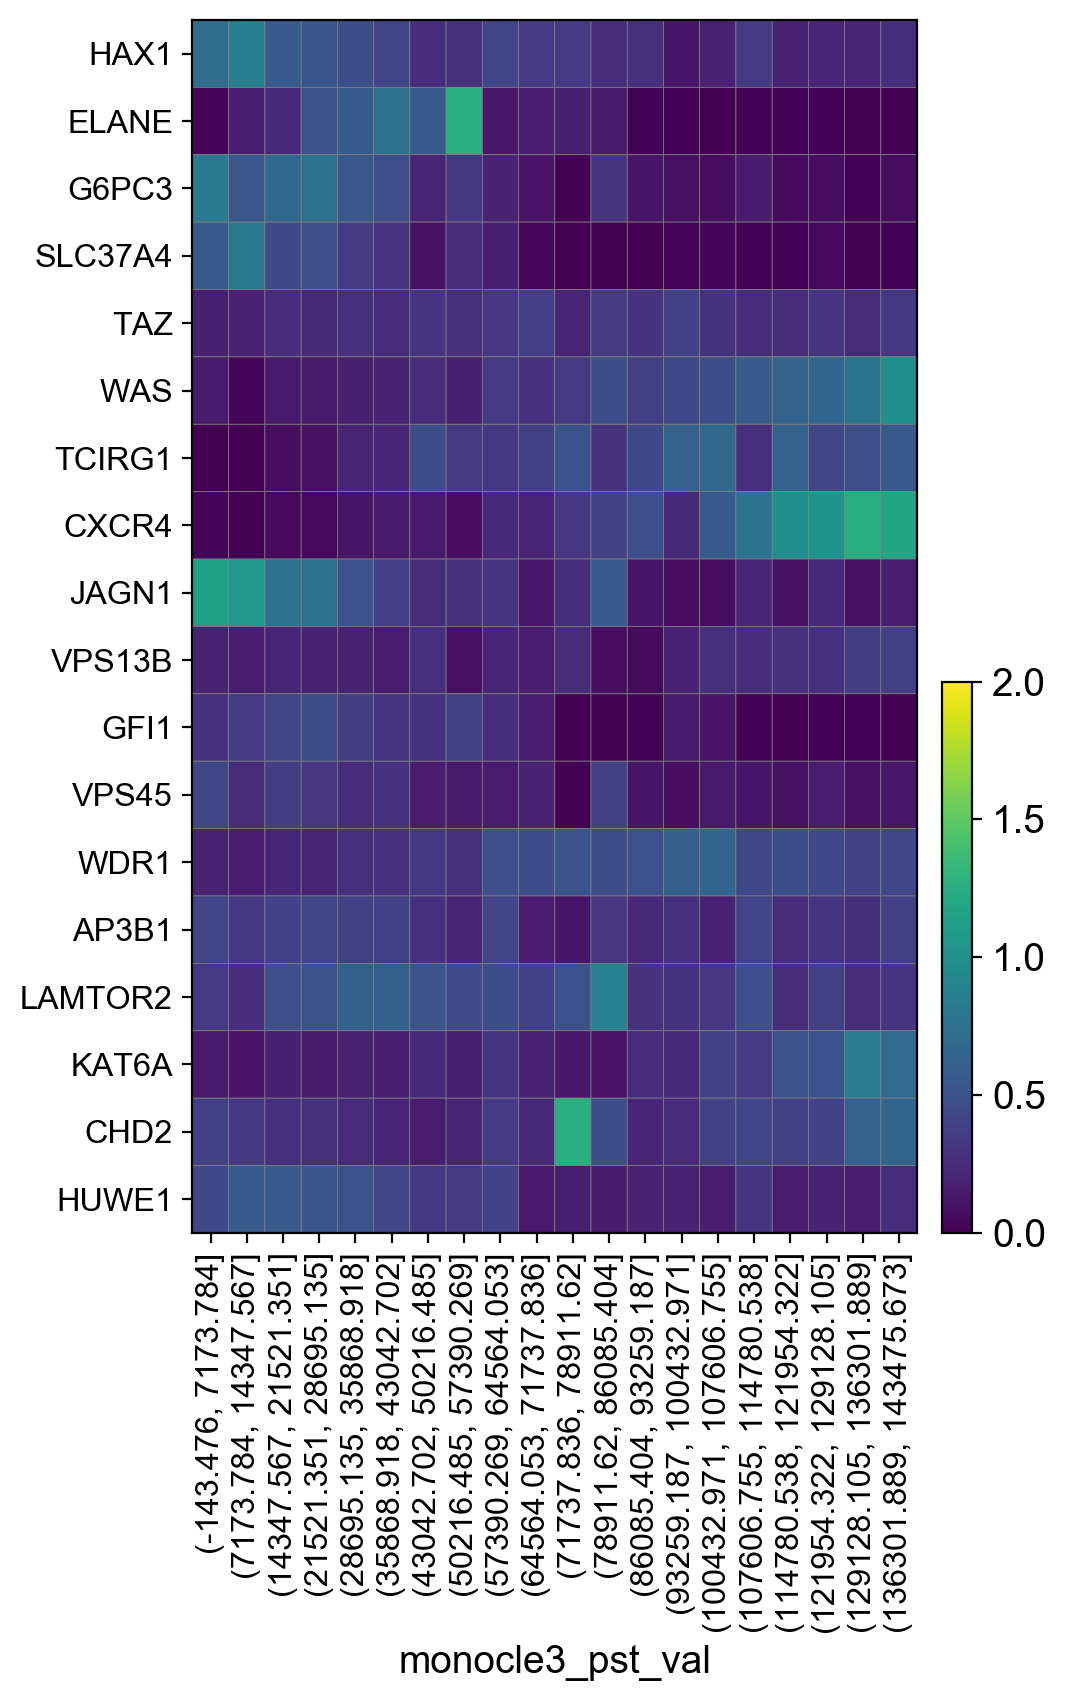

In [6]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=genes, save="fig2e_2f_neut_pst_genes_20200615.pdf", num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[5,8], vmax=2)

# Run density plot for celltypes

HSC
#d200d2
MPP myeloid
#0000ff
CMP
#a56900
GMP
#f79d00
neut myeloid
#ffc055
promyelocyte
#ff254e
myelocyte
#ff7790
neutrophil
#ffc7d2


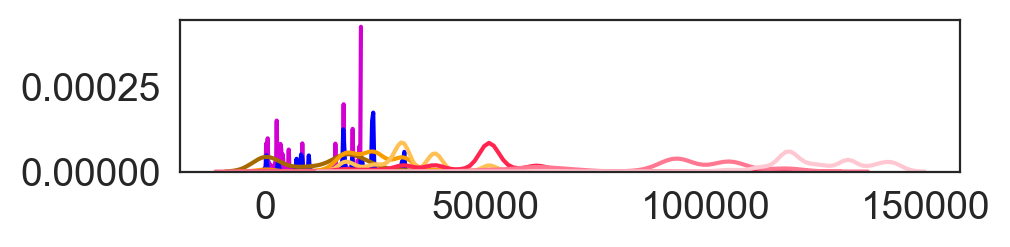

In [7]:
df = pd.DataFrame(adata.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['HSC', 'MPP myeloid', 'CMP', 'GMP', 'neut myeloid', 'promyelocyte', 'myelocyte', 'neutrophil']
colour_list = ['#d200d2', '#0000ff', '#a56900', '#f79d00', '#ffc055', '#ff254e', '#ff7790', '#ffc7d2']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["cell.labels"]==i]
    ax=sns.kdeplot(subset_df["monocle3_pst_val"], color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/useful_scripts/fig2_myeloid/figures/neut_pst_celltypes_20200615.pdf')